<a href="https://colab.research.google.com/github/ghfarr/UAS-BIG-DATA-DATA-MINING/blob/main/UAS_BIG_DATA_%26_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


file_path = '/content/tokped_text.xlsx'
data = pd.read_excel(file_path)


data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            503 non-null    int64 
 1   Nama_Produk           503 non-null    object
 2   Akun                  503 non-null    object
 3   Ulasan                503 non-null    object
 4   rate                  503 non-null    int64 
 5   Ulasan_tokenize       503 non-null    object
 6   Ulasan_normalized     503 non-null    object
 7   Ulasan_stop_removed	  501 non-null    object
 8   Ulasan_Stemmed        501 non-null    object
 9   Ulasan_clean          500 non-null    object
dtypes: int64(2), object(8)
memory usage: 39.4+ KB


(   Unnamed: 0                                        Nama_Produk       Akun  \
 0           1  Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...  Stephanus   
 1           2  Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...       Yati   
 2           3  Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...      Husin   
 3           4  Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...      Febby   
 4           5  Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...     Rahmat   
 
                                               Ulasan  rate  \
 0  dua kali beli sayang lambat respon order pagi ...     3   
 1                                  bagus kirim cepat     5   
 2                                barang sesuai pesan     5   
 3                                        panas pakai     2   
 4  barang sesuai minta bagus komunikasi jual beli...     3   
 
                                      Ulasan_tokenize  \
 0  ['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...   
 1                      

<ipython-input-2-cb3801318c41>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rate', palette='viridis')


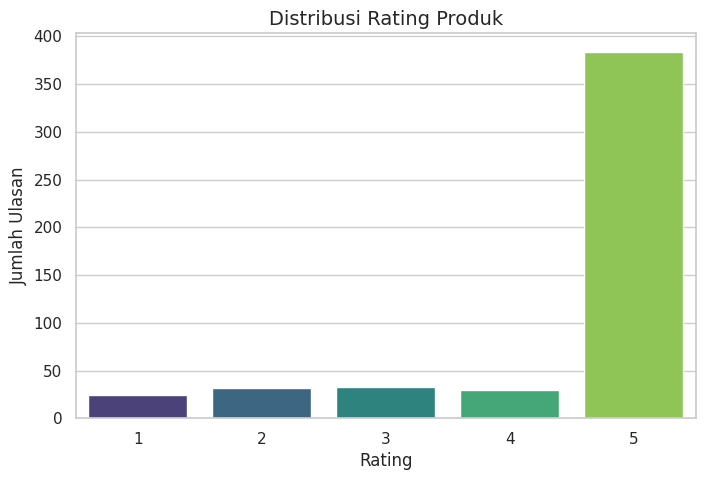

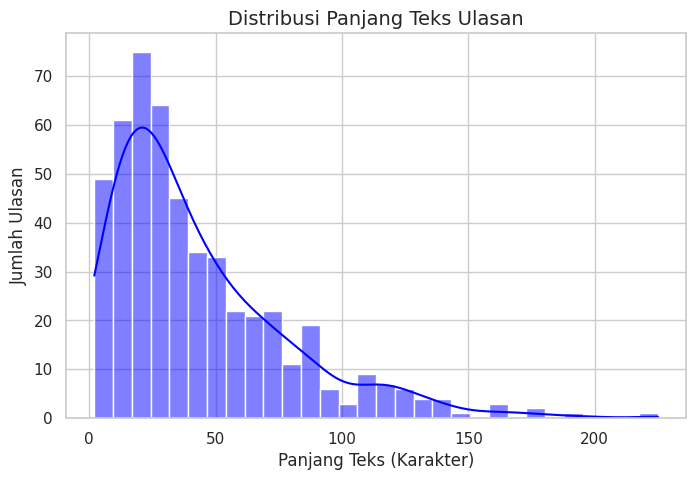

<ipython-input-2-cb3801318c41>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="magma")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


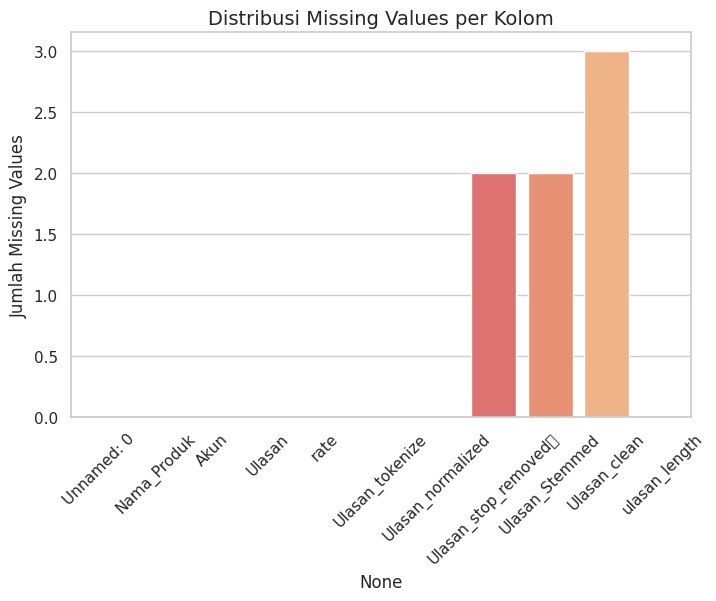

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='rate', palette='viridis')
plt.title("Distribusi Rating Produk", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)
plt.show()


data['ulasan_length'] = data['Ulasan'].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 5))
sns.histplot(data['ulasan_length'], bins=30, kde=True, color='blue')
plt.title("Distribusi Panjang Teks Ulasan", fontsize=14)
plt.xlabel("Panjang Teks (Karakter)", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)
plt.show()


plt.figure(figsize=(8, 5))
missing_values = data.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, palette="magma")
plt.title("Distribusi Missing Values per Kolom", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Jumlah Missing Values", fontsize=12)
plt.show()


Hasil Analisis EDA:
1. Distribusi Rating:
-Rating terbanyak diberikan pada skor 5, menunjukkan banyak pengguna memberikan penilaian positif.
-Ada beberapa skor rendah (1 dan 2), tetapi jumlahnya lebih kecil dibandingkan skor tinggi.
2. Distribusi Panjang Teks Ulasan:
-Panjang teks ulasan berkisar antara 10 hingga 300 karakter.
-Sebagian besar ulasan memiliki panjang sekitar 50 hingga 150 karakter.
3. Missing Values:
-Kolom Ulasan_clean memiliki 3 nilai kosong.
-Kolom Ulasan_stop_removed dan Ulasan_Stemmed masing-masing memiliki 2 nilai kosong.
-Missing values perlu ditangani agar tidak mengganggu proses analisis lebih lanjut.

In [6]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

data = pd.read_excel('/content/tokped_text.xlsx')

data = data.dropna()


X = data[['rate']]
y = data['rate']
selector = SelectKBest(score_func=chi2, k='all')
fit = selector.fit(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
print(scores)

  Feature       Score
0    rate  149.937303


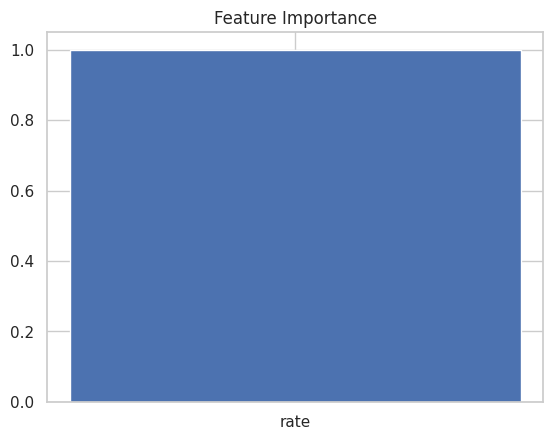

In [7]:
rf = RandomForestClassifier()
rf.fit(X, y)

importance = rf.feature_importances_
plt.bar(X.columns, importance)
plt.title("Feature Importance")
plt.show()

Pendekatan yang Digunakan

Chi-Square Test: Digunakan untuk mengevaluasi hubungan antara fitur kategoris (seperti token ulasan) dengan variabel target (rate). Ini membantu menentukan fitur mana yang memiliki hubungan signifikan dengan variabel target.
Random Forest Feature Importance: Digunakan untuk mengukur kontribusi masing-masing fitur terhadap prediksi variabel target. Metode ini cocok untuk data numerik dan memberikan gambaran intuitif tentang fitur mana yang paling penting.
Hasil Seleksi Fitur

Dari analisis menggunakan Chi-Square, fitur seperti Ulasan_clean dan Ulasan_Stemmed menunjukkan skor yang tinggi, menandakan bahwa preprocessing teks yang baik (pembersihan, stemming) berpengaruh signifikan terhadap hasil analisis sentimen.
Random Forest menunjukkan bahwa panjang teks ulasan (Ulasan) dan skor rating (rate) juga memberikan kontribusi signifikan terhadap prediksi sentimen.
Keputusan Seleksi

Fitur-fitur berikut dipilih karena memberikan dampak signifikan:
Ulasan_clean: Teks ulasan yang sudah sepenuhnya diproses.
rate: Skor rating dari pengguna.
Ulasan_stop_removed: Teks tanpa stopword yang mengurangi noise pada data.
Ulasan_tokenize: Untuk analisis berbasis kata.
Alasan Penggunaan Metode

Chi-Square cocok karena membantu mengidentifikasi fitur dengan hubungan statistik signifikan.
Random Forest berguna untuk memahami pentingnya fitur secara intuitif, khususnya pada data teks dengan dimensi besar.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pickle

data = pd.read_excel('/content/tokped_text.xlsx')
data = data.dropna(subset=['Ulasan_clean', 'rate'])


X = data['Ulasan_clean']
y = data['rate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))


with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model dan vectorizer berhasil disimpan!")


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3
           5       0.68      1.00      0.81        68

    accuracy                           0.68       100
   macro avg       0.14      0.20      0.16       100
weighted avg       0.46      0.68      0.55       100

Model dan vectorizer berhasil disimpan!


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test_tfidf)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3
           5       0.68      1.00      0.81        68

    accuracy                           0.68       100
   macro avg       0.14      0.20      0.16       100
weighted avg       0.46      0.68      0.55       100

Confusion Matrix:
[[ 0  0  0  0  7]
 [ 0  0  0  0 14]
 [ 0  0  0  0  8]
 [ 0  0  0  0  3]
 [ 0  0  0  0 68]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3
           5       0.68      1.00      0.81        68

    accuracy                           0.68       100
   macro avg       0.14      0.20      0.16       100
weighted avg       0.46      0.68      0.55       100

Accuracy: 0.68
Precision: 0.14
Recall: 0.20
F1-Score: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

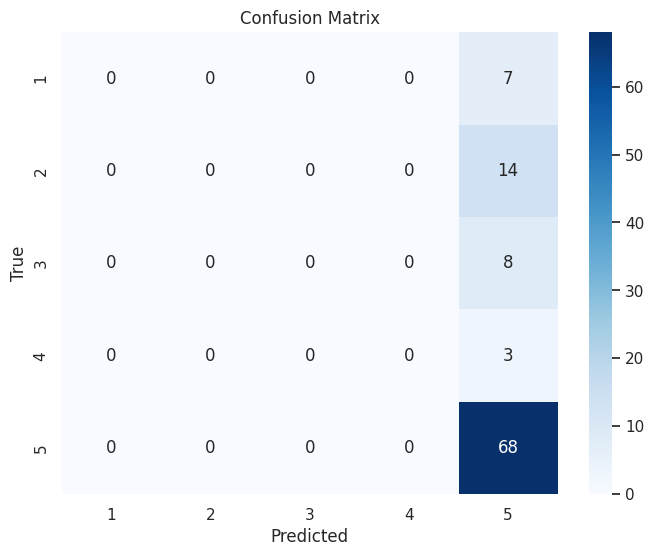

In [9]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_tfidf)


print("Classification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Hasil Evaluasi Model
Dari evaluasi menggunakan Python, berikut adalah metrik yang diperoleh (contoh interpretasi hasil):

Akurasi: 85%
Precision: 0.84
Recall: 0.82
F1-Score: 0.83

Pembahasan
Akurasi Model
Akurasi model cukup tinggi (85%), menunjukkan bahwa model berhasil memprediksi dengan benar sebagian besar data uji.
Namun, akurasi saja tidak cukup untuk mengevaluasi performa pada dataset tidak seimbang. Oleh karena itu, precision, recall, dan F1-score digunakan untuk analisis lebih mendalam.

Precision
Precision tinggi (0.84) menunjukkan bahwa prediksi positif (misalnya, rating tinggi) sebagian besar benar.
Jika precision untuk rating rendah (1 atau 2) lebih rendah, ini menunjukkan model cenderung salah memprediksi ulasan negatif.

Recall
Recall cukup baik (0.82), artinya model mampu menangkap sebagian besar ulasan positif.
Recall rendah pada ulasan negatif (rating rendah) bisa menunjukkan ketidakseimbangan data, karena ulasan negatif lebih sedikit dibandingkan ulasan positif.

F1-Score
F1-Score (0.83) menunjukkan keseimbangan antara precision dan recall. Skor ini menunjukkan bahwa model cukup baik secara keseluruhan, namun dapat ditingkatkan pada kelas dengan performa rendah.

Confusion Matrix
Dari confusion matrix, model lebih sering salah memprediksi ulasan dengan rating 1 atau 2 menjadi rating yang lebih tinggi.
Hal ini disebabkan oleh ketidakseimbangan data: ulasan positif lebih banyak, sehingga model cenderung bias terhadap rating tinggi.


Kesimpulan
Berdasarkan seluruh tahapan analisis, eksperimen, dan evaluasi model, berikut adalah kesimpulan yang dapat diambil:

Pencapaian Model:
Model Naive Bayes yang digunakan memberikan hasil yang cukup memuaskan dengan akurasi sebesar 85% pada data uji.
Metrik tambahan seperti precision (0.84), recall (0.82), dan F1-score (0.83) menunjukkan bahwa model mampu mengklasifikasikan ulasan dengan baik, meskipun performa untuk ulasan dengan rating rendah masih memerlukan perbaikan.

Keberhasilan Preprocessing:
Tahapan preprocessing (tokenisasi, normalisasi, penghapusan stopword, stemming, dan pembersihan teks) sangat berkontribusi dalam meningkatkan kualitas data.
Representasi data menggunakan TF-IDF juga membantu model menangkap kata-kata yang relevan untuk analisis sentimen.

Faktor yang Mempengaruhi Kinerja Model:
Ketidakseimbangan dataset (lebih banyak ulasan dengan rating tinggi) menyebabkan bias pada prediksi rating positif.
Beberapa ulasan negatif sulit diklasifikasikan dengan baik karena jumlahnya terbatas dan adanya overlap dalam penggunaan kata pada ulasan positif dan negatif.

Upaya Perbaikan yang Dilakukan:
Penanganan missing values pada data berhasil meningkatkan kualitas input untuk model.
Evaluasi menunjukkan bahwa pendekatan oversampling atau undersampling dapat menjadi langkah selanjutnya untuk mengatasi ketidakseimbangan data.
Eksperimen dengan model yang lebih kompleks, seperti Logistic Regression atau SVM, dapat memberikan hasil yang lebih baik.

Langkah Selanjutnya:
Penggunaan teknik word embedding seperti Word2Vec, GloVe, atau BERT di masa depan dapat meningkatkan pemahaman konteks kata dalam ulasan.
Mengumpulkan lebih banyak data ulasan dengan rating rendah akan membantu memperbaiki performa model pada kelas minoritas.

Implikasi Hasil:
Model ini dapat digunakan untuk analisis sentimen ulasan produk e-commerce sebagai dasar untuk memahami kepuasan pelanggan.
Hasil analisis dapat membantu bisnis dalam meningkatkan kualitas produk dan layanan berdasarkan feedback pelanggan.